<a href="https://colab.research.google.com/github/rashidali2305/Elevate-Labs/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn scikit-learn


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [10]:
import os

os.listdir("/kaggle/input/titanic-dataset")


['Titanic-Dataset.csv']

/tmp/ipython-input-3197904212.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Survived", col="Sex", kind="count", data=df, palette="Set1")


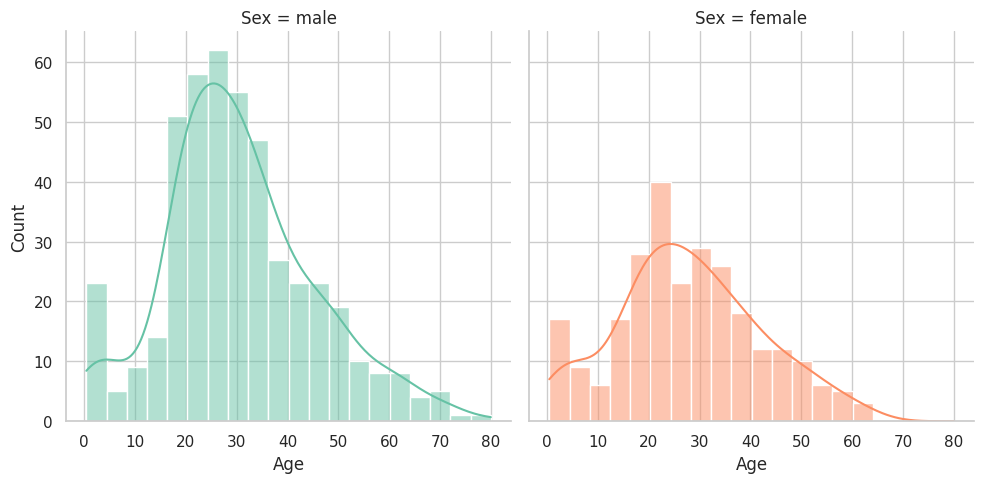

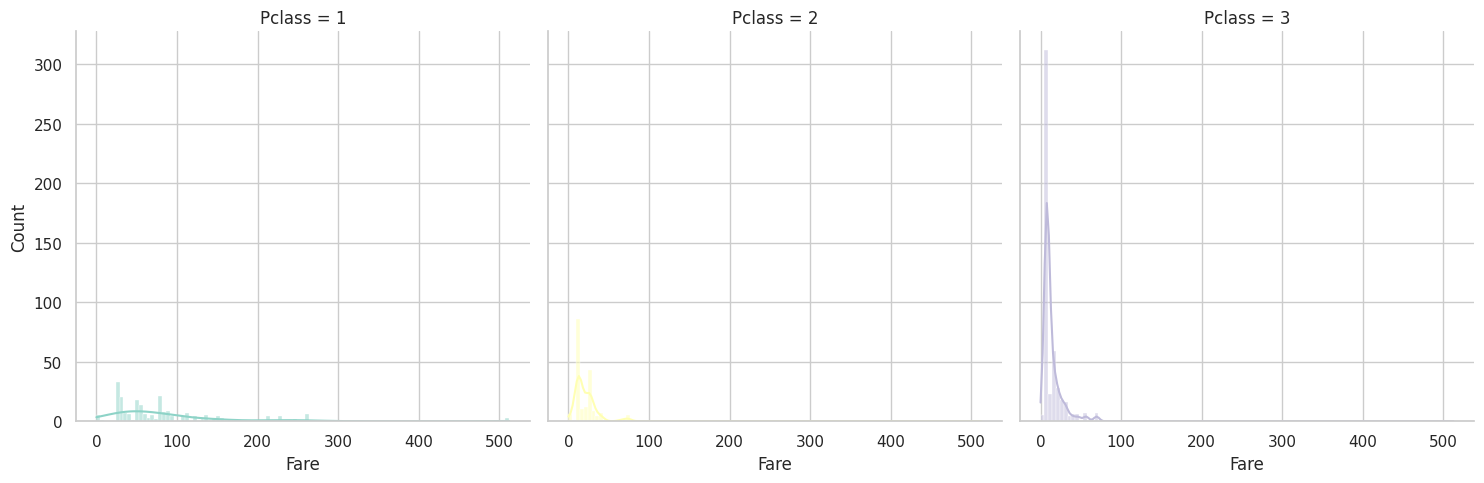

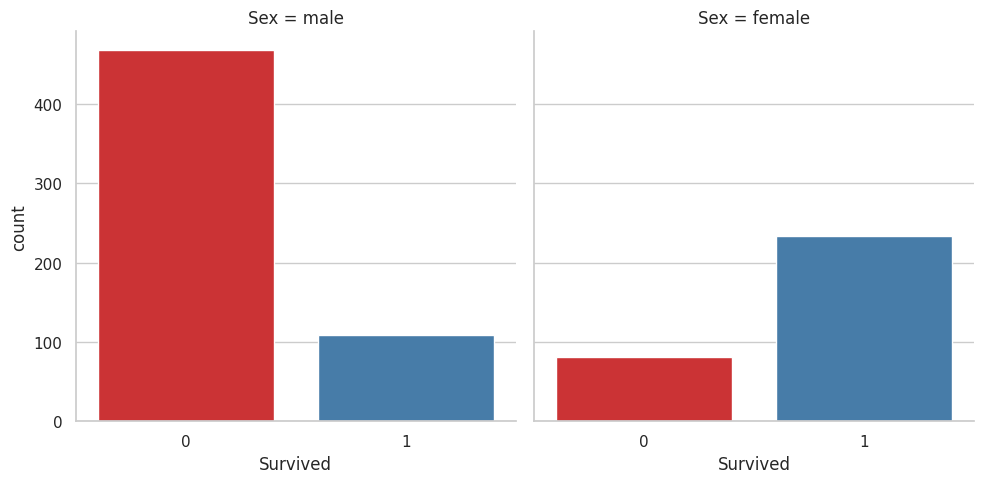

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()
sns.set(style="whitegrid")
sns.displot(df, x="Age", col="Sex", hue="Sex", palette="Set2", legend=False, kde=True)
sns.displot(df, x="Fare", col="Pclass", hue="Pclass", palette="Set3", legend=False, kde=True)
sns.catplot(x="Survived", col="Sex", kind="count", data=df, palette="Set1")
plt.show()




In [15]:
import pandas as pd

df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

print("Summary statistics using describe():")
print(df.describe(include="all"))

print("\nMedian of numerical columns:")
print(df.median(numeric_only=True))

print("\nStandard Deviation of numerical columns:")
print(df.std(numeric_only=True))

print("\nMode of columns:")
print(df.mode().iloc[0])


Summary statistics using describe():
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embar

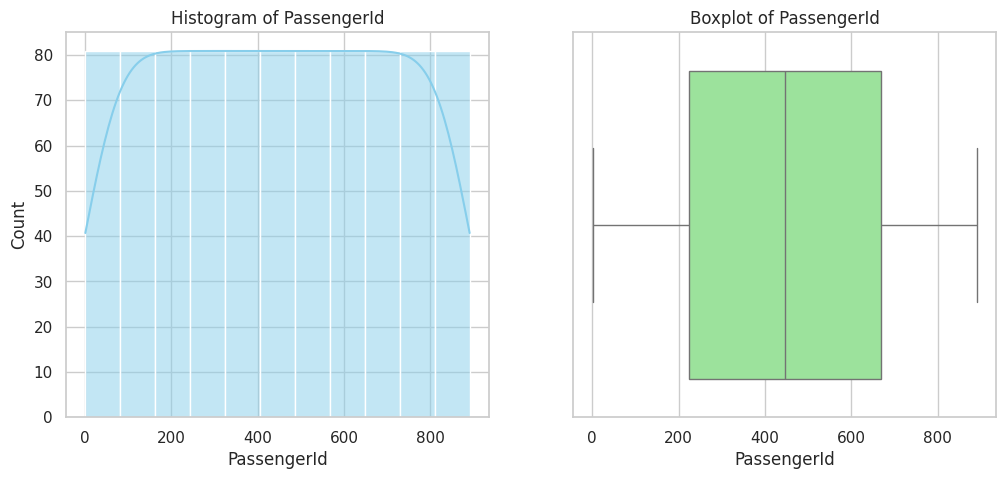

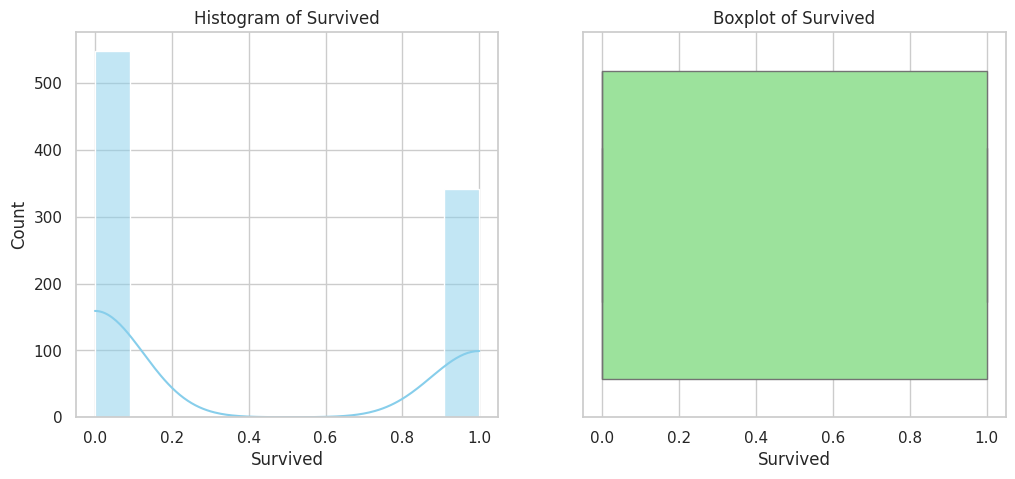

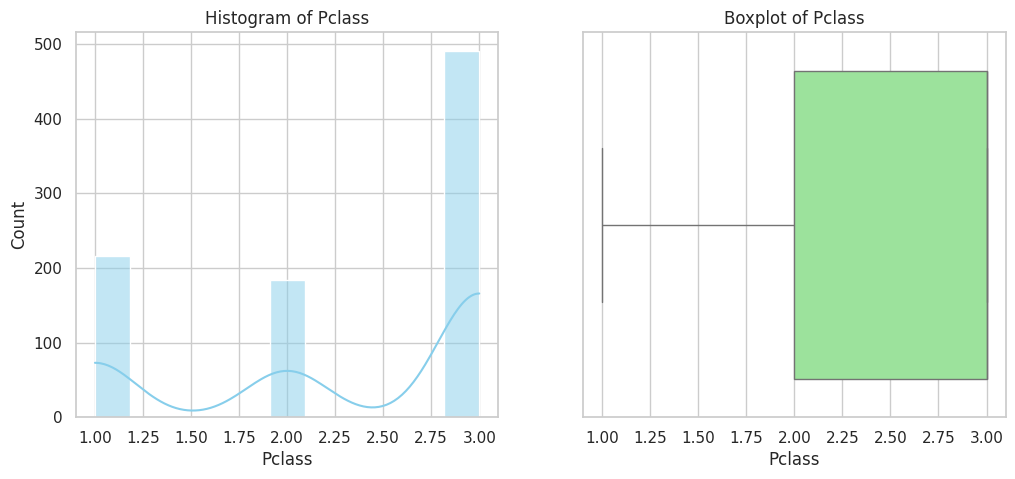

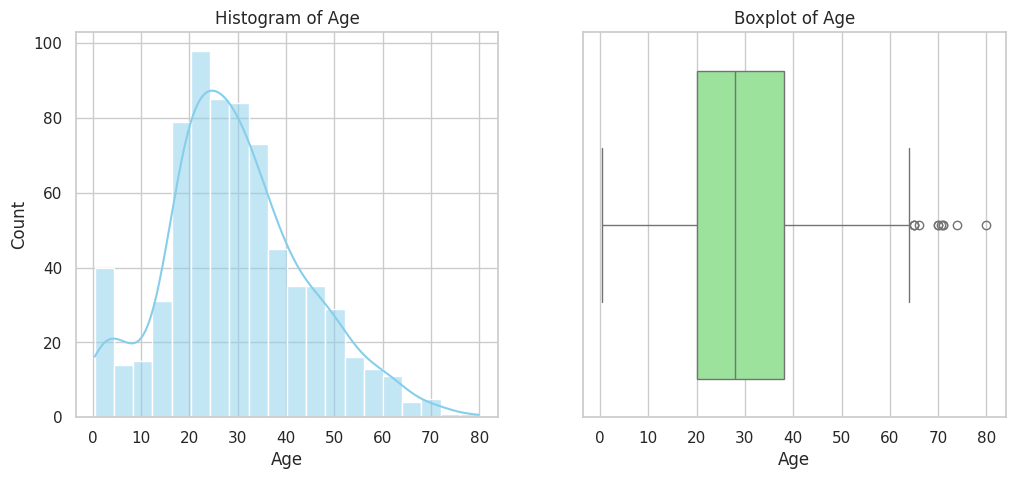

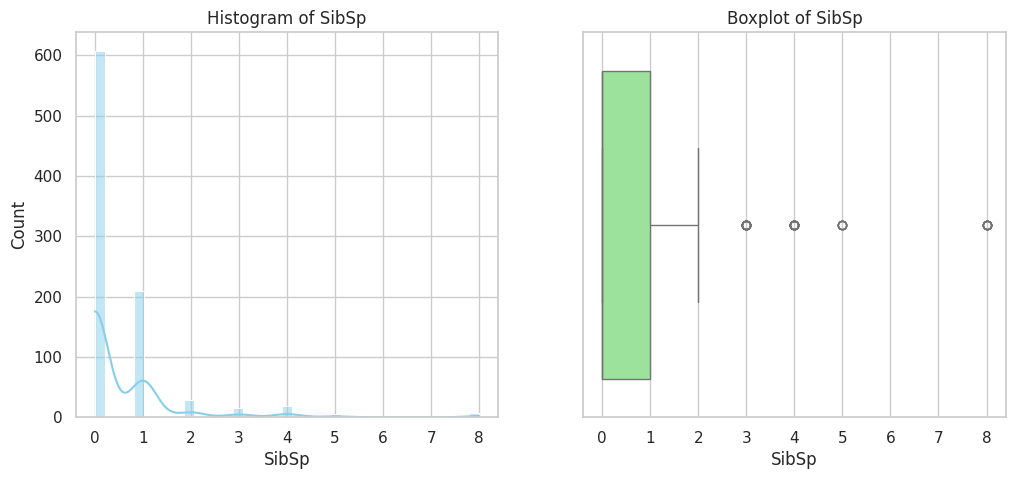

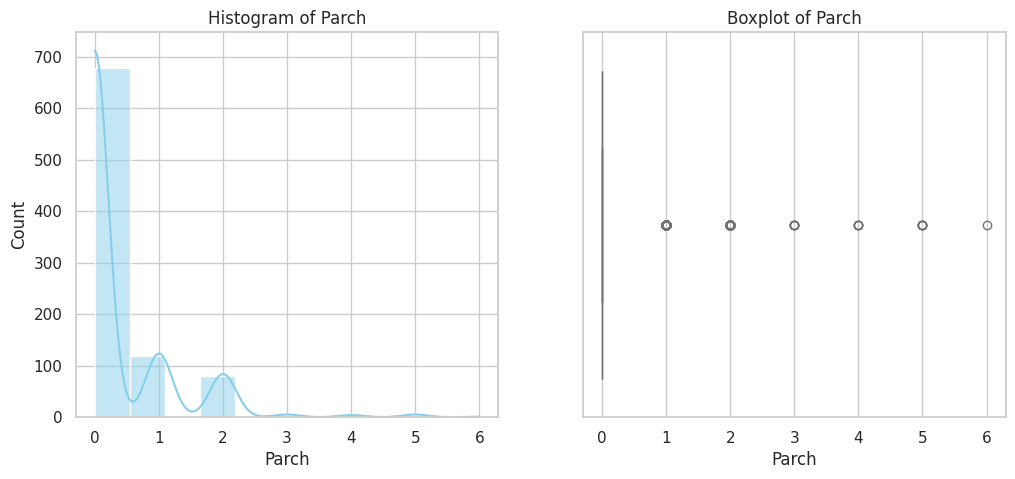

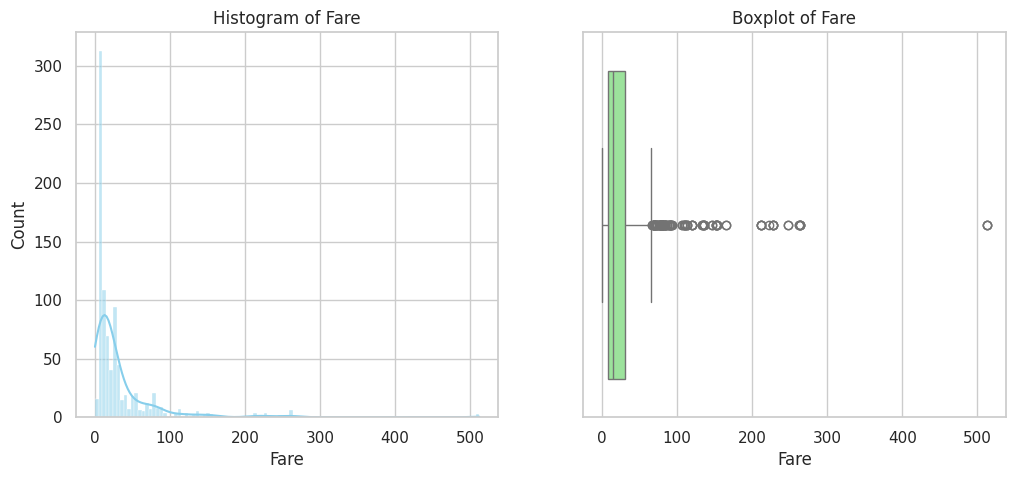

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, color="skyblue")
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f'Boxplot of {col}')

    plt.show()


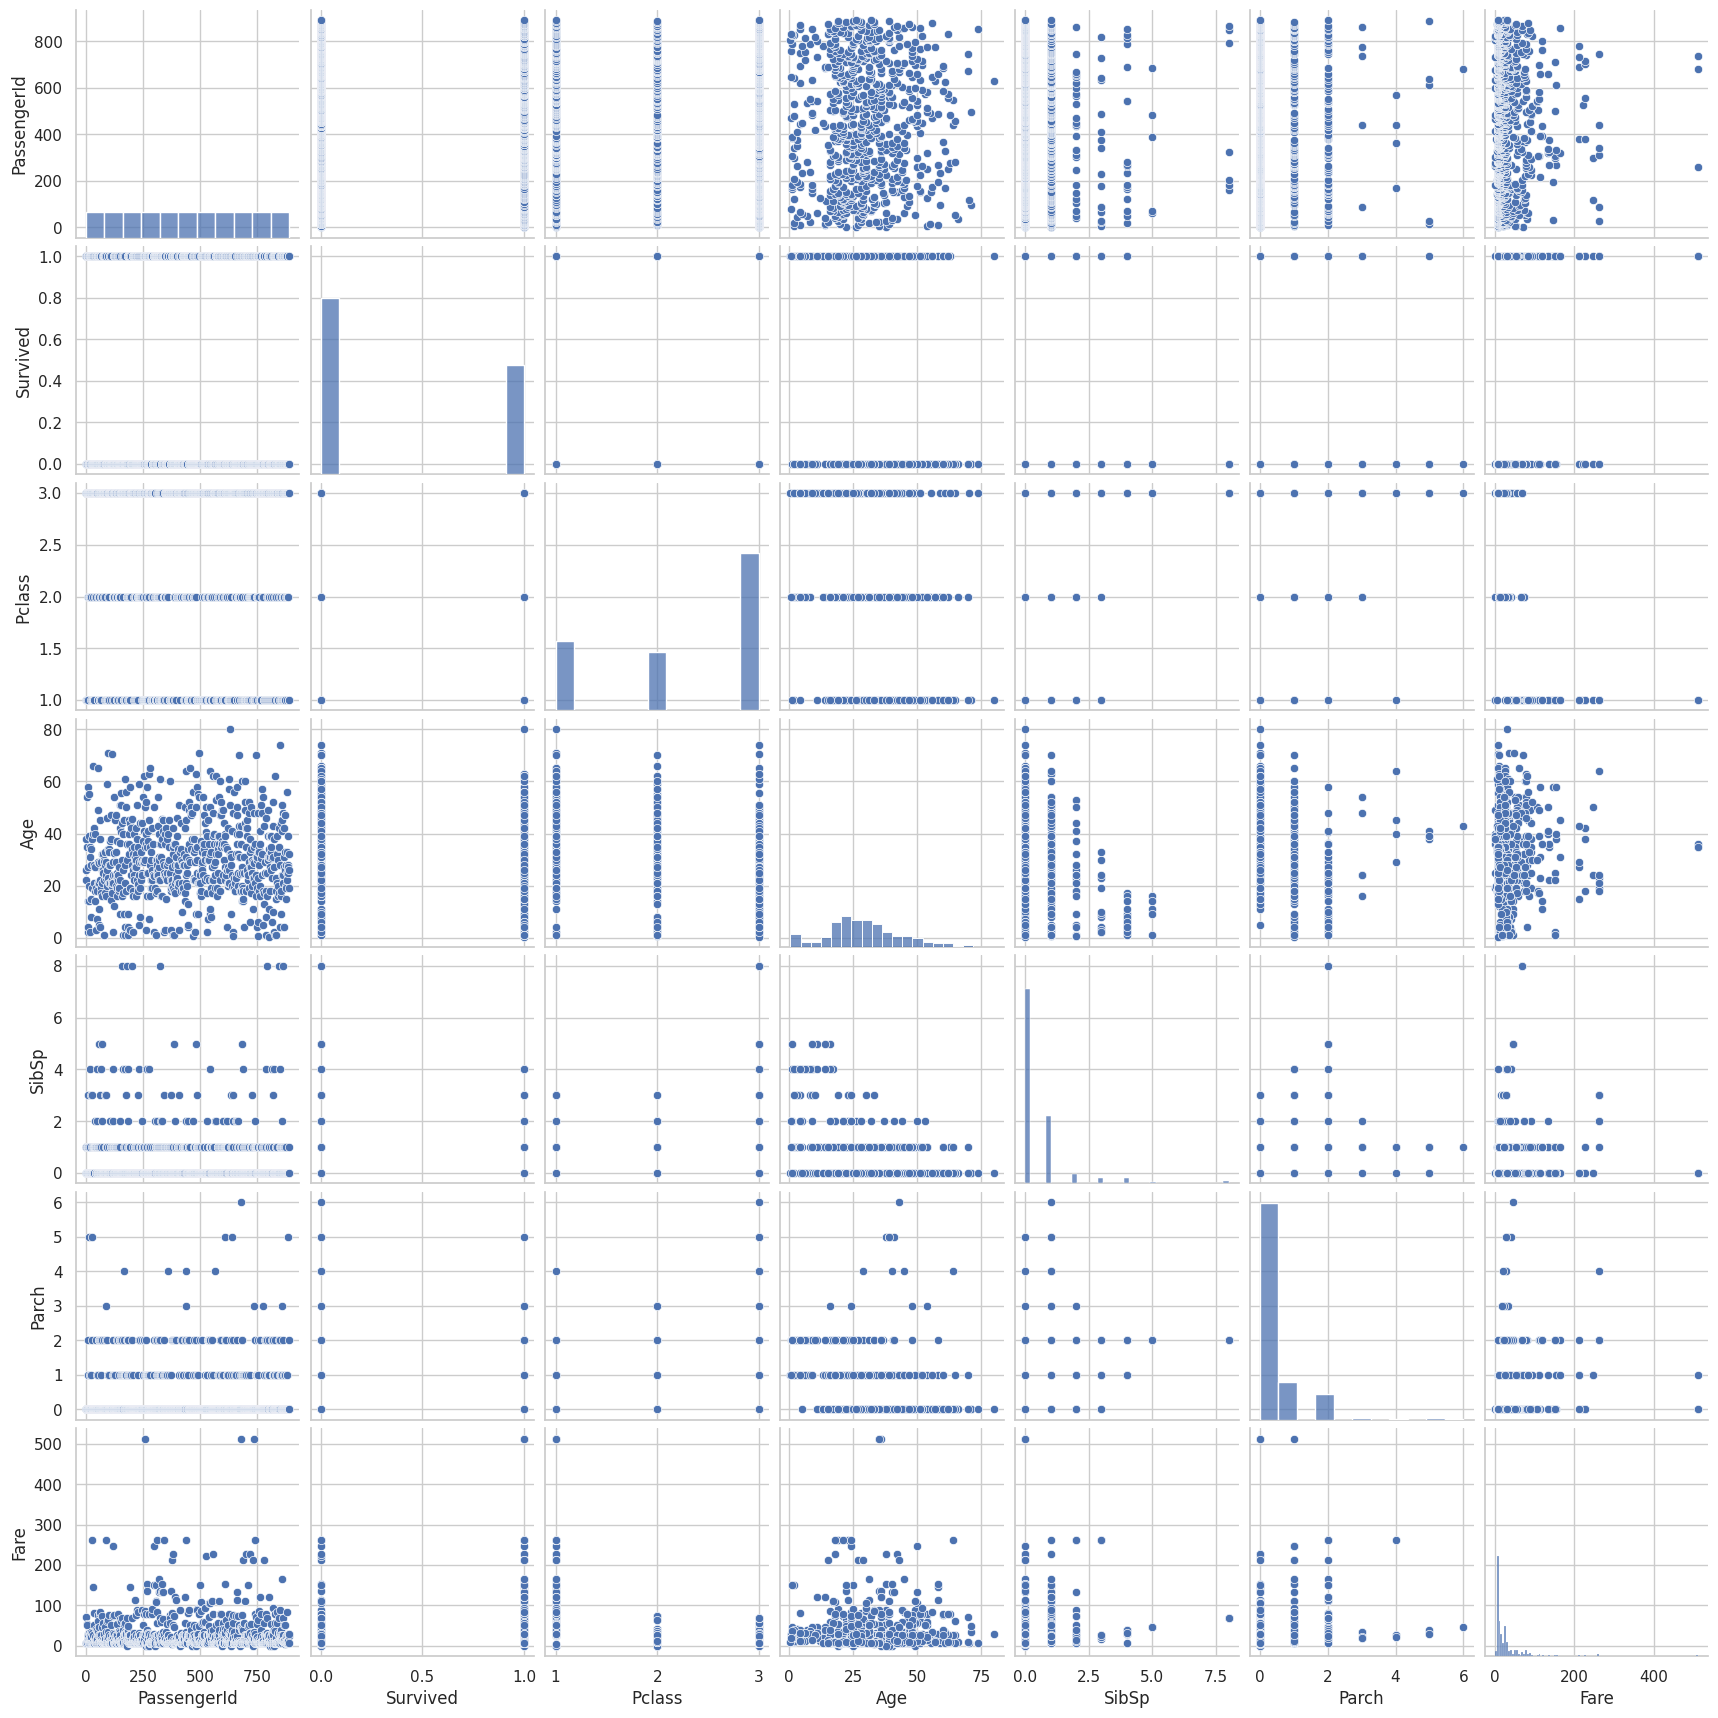

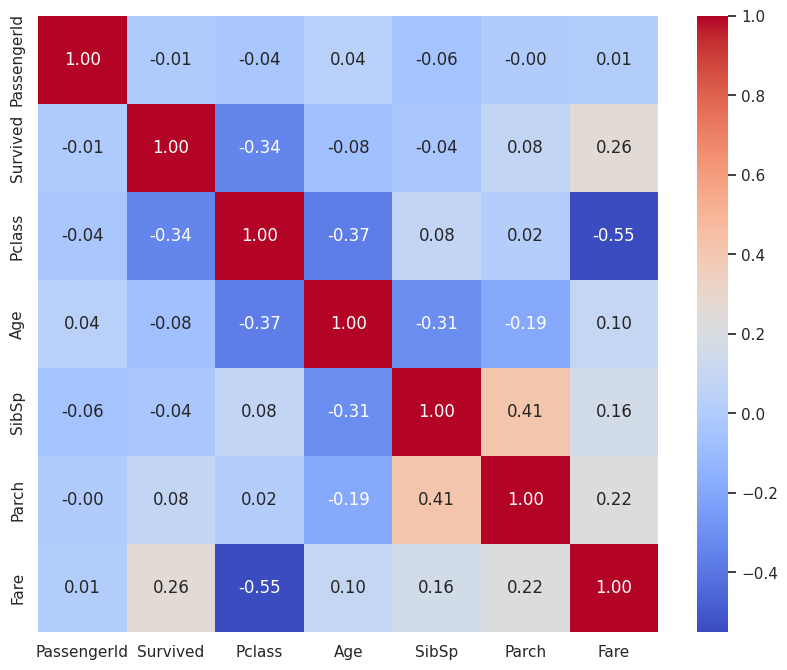

In [17]:

df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

sns.pairplot(df[numeric_cols])
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


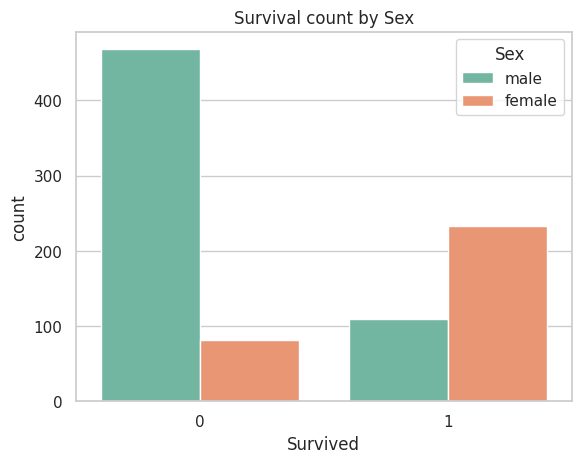

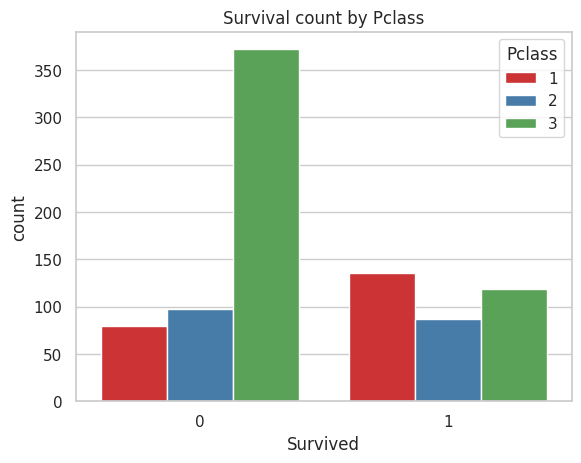

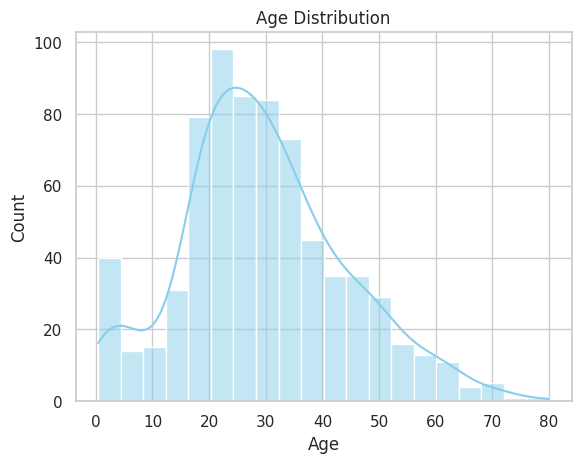

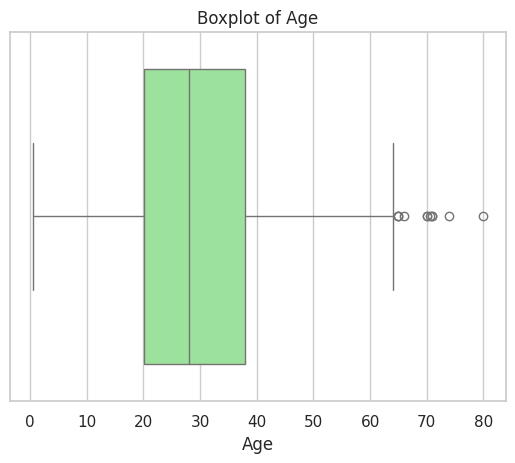

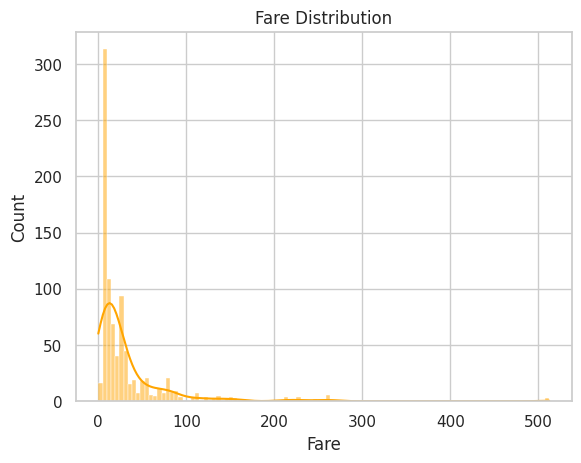

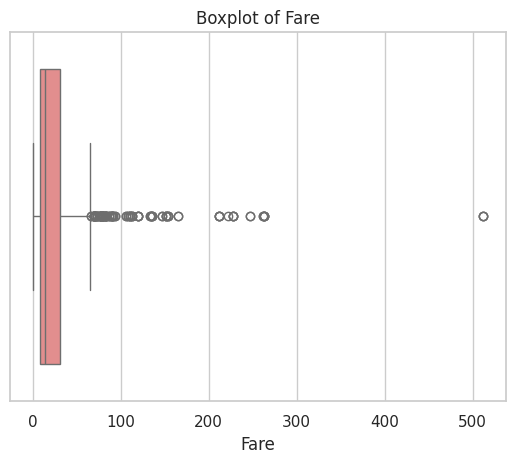

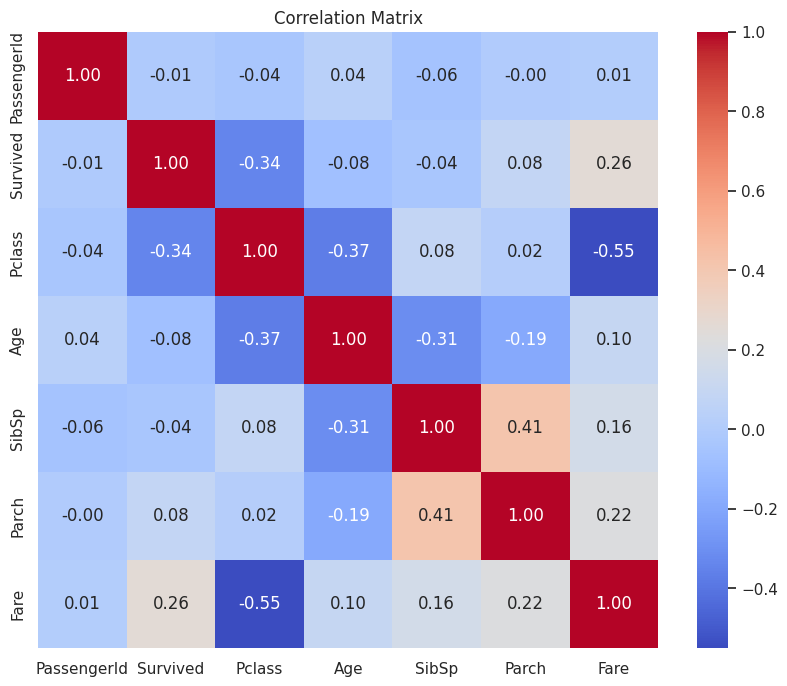

In [18]:


df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

print("Missing values in each column:\n", df.isnull().sum())

sns.countplot(x="Survived", hue="Sex", data=df, palette="Set2")
plt.title("Survival count by Sex")
plt.show()

sns.countplot(x="Survived", hue="Pclass", data=df, palette="Set1")
plt.title("Survival count by Pclass")
plt.show()

sns.histplot(df['Age'].dropna(), kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

sns.boxplot(x=df['Age'], color="lightgreen")
plt.title("Boxplot of Age")
plt.show()

sns.histplot(df['Fare'], kde=True, color="orange")
plt.title("Fare Distribution")
plt.show()

sns.boxplot(x=df['Fare'], color="lightcoral")
plt.title("Boxplot of Fare")
plt.show()

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [25]:

df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

inferences = []

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Analyze numeric features
for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    missing = df[col].isnull().sum()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]

    if "Survived" in df.columns and col != "Survived":
        corr = df[col].corr(df["Survived"])
    else:
        corr = np.nan

    corr_text = f"{corr:.2f}" if not np.isnan(corr) else "NA"
    inference_label = "Strongly predictive" if not np.isnan(corr) and abs(corr) > 0.3 else "May be useful"

    inferences.append({
        "Feature": col,
        "Type": "Numeric",
        "Missing": missing,
        "Mean": round(mean_val,2),
        "Median": round(median_val,2),
        "Std": round(std_val,2),
        "Min": min_val,
        "Max": max_val,
        "Outliers": outliers,
        "Correlation_with_Survived": corr_text,
        "Inference": inference_label
    })

# Analyze categorical features
for col in cat_cols:
    missing = df[col].isnull().sum()
    top_val = df[col].mode()[0] if not df[col].mode().empty else "NA"
    top_count = df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0
    top_percent = round((top_count / df.shape[0])*100,2)

    if "Survived" in df.columns:
        temp = df[[col, "Survived"]].copy()
        temp[col] = temp[col].astype('category').cat.codes
        corr = temp[col].corr(temp["Survived"])
    else:
        corr = np.nan

    corr_text = f"{corr:.2f}" if not np.isnan(corr) else "NA"
    inference_label = "Strongly predictive" if not np.isnan(corr) and abs(corr) > 0.3 else "May be useful"

    inferences.append({
        "Feature": col,
        "Type": "Categorical",
        "Missing": missing,
        "Top_category": top_val,
        "Top_category_percent": top_percent,
        "Correlation_with_Survived": corr_text,
        "Inference": inference_label
    })

# Final inference table
inference_df = pd.DataFrame(inferences)

# Display table neatly
from IPython.display import display
display(inference_df)


,Feature,Type,Missing,Mean,Median,Std,Min,Max,Outliers,Correlation_with_Survived,Inference,Top_category,Top_category_percent
0,PassengerId,Numeric,0,446.00,446.00,257.35,1.00,891.0000,0.0,-0.01,May be useful,NaN,NaN
1,Survived,Numeric,0,0.38,0.00,0.49,0.00,1.0000,0.0,NA,May be useful,NaN,NaN
2,Pclass,Numeric,0,2.31,3.00,0.84,1.00,3.0000,0.0,-0.34,Strongly predictive,NaN,NaN
3,Age,Numeric,177,29.70,28.00,14.53,0.42,80.0000,11.0,-0.08,May be useful,NaN,NaN
4,SibSp,Numeric,0,0.52,0.00,1.10,0.00,8.0000,46.0,-0.04,May be useful,NaN,NaN
5,Parch,Numeric,0,0.38,0.00,0.81,0.00,6.0000,213.0,0.08,May be useful,NaN,NaN
6,Fare,Numeric,0,32.20,14.45,49.69,0.00,512.3292,116.0,0.26,May be useful,NaN,NaN
7,Name,Categorical,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.06,May be useful,"Abbing, Mr. Anthony",0.11
8,Sex,Categorical,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.54,Strongly predictive,male,64.76
9,Ticket,Categorical,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.16,May be useful,1601,0.79


from matplotlib import pyplot as plt
inference_df['Missing'].plot(kind='hist', bins=20, title='Missing')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Mean'].plot(kind='hist', bins=20, title='Mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Median'].plot(kind='hist', bins=20, title='Median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Std'].plot(kind='hist', bins=20, title='Std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
inference_df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
inference_df.groupby('Inference').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
inference_df.groupby('Top_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df.plot(kind='scatter', x='Missing', y='Mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df.plot(kind='scatter', x='Mean', y='Median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df.plot(kind='scatter', x='Median', y='Std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df.plot(kind='scatter', x='Std', y='Min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Missing'].plot(kind='line', figsize=(8, 4), title='Missing')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Mean'].plot(kind='line', figsize=(8, 4), title='Mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Median'].plot(kind='line', figsize=(8, 4), title='Median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
inference_df['Std'].plot(kind='line', figsize=(8, 4), title='Std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Inference'].value_counts()
    for x_label, grp in inference_df.groupby('Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Type')
_ = plt.ylabel('Inference')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Top_category'].value_counts()
    for x_label, grp in inference_df.groupby('Inference')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Inference')
_ = plt.ylabel('Top_category')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(inference_df['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(inference_df, x='Missing', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(inference_df['Inference'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(inference_df, x='Missing', y='Inference', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(inference_df['Top_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(inference_df, x='Missing', y='Top_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(inference_df['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(inference_df, x='Mean', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)